In [1]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
sns.set_style('darkgrid')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Gold_data.csv to Gold_data.csv


In [6]:
# Loading the data
df=pd.read_csv("Gold_data.csv")

# EDA

In [7]:
# looking for the shape of the data
df.shape

(2182, 2)

In [8]:
# We can see we have 6 years of data

In [9]:
# checking the Descriptive Satats
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [10]:
# here we observe min, max, stdv ,%tile of the price column
# price range is between 2252 to 4966
# by looking towards 75% & max we can say no outlier is there

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


### Date Column Extraction

In [12]:
df["Date"] = pd.to_datetime(df['date'],format="%Y-%m-%d")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y")
df['days'] = df.Date.dt.strftime("%d")

In [13]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [14]:
months_dummies = pd.DataFrame(pd.get_dummies(df['month'],columns=months))
months_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0,0,1,0,0,0,0,0,0,0,0,0
2178,0,0,1,0,0,0,0,0,0,0,0,0
2179,0,0,1,0,0,0,0,0,0,0,0,0
2180,0,0,1,0,0,0,0,0,0,0,0,0


In [15]:
df = pd.concat([df,months_dummies], axis = 1)

In [16]:
df

,date,price,Date,month,year,days,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2016-01-01,2252.60,2016-01-01,Jan,2016,01,0,0,0,0,1,0,0,0,0,0,0,0
1,2016-01-02,2454.50,2016-01-02,Jan,2016,02,0,0,0,0,1,0,0,0,0,0,0,0
2,2016-01-03,2708.10,2016-01-03,Jan,2016,03,0,0,0,0,1,0,0,0,0,0,0,0
3,2016-01-04,2577.80,2016-01-04,Jan,2016,04,0,0,0,0,1,0,0,0,0,0,0,0
4,2016-01-05,2597.75,2016-01-05,Jan,2016,05,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021-12-17,Dec,2021,17,0,0,1,0,0,0,0,0,0,0,0,0
2178,2021-12-18,4389.50,2021-12-18,Dec,2021,18,0,0,1,0,0,0,0,0,0,0,0,0
2179,2021-12-19,4389.50,2021-12-19,Dec,2021,19,0,0,1,0,0,0,0,0,0,0,0,0
2180,2021-12-20,4354.10,2021-12-20,Dec,2021,20,0,0,1,0,0,0,0,0,0,0,0,0


In [17]:
df.isna().sum()

date     0
price    0
Date     0
month    0
year     0
days     0
Apr      0
Aug      0
Dec      0
Feb      0
Jan      0
Jul      0
Jun      0
Mar      0
May      0
Nov      0
Oct      0
Sep      0
dtype: int64

In [18]:
# the observation is there is [no] not null value,
# target column data type is float.


# Outlier Detection

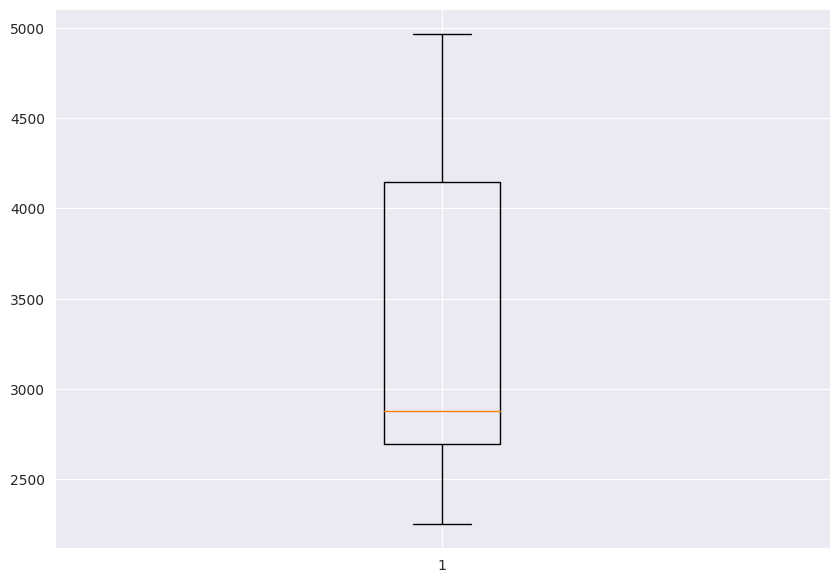

In [19]:
plt.boxplot(df['price'])
plt.rcParams['figure.figsize'] = (10,7)

# Visualization

### Checking Trend

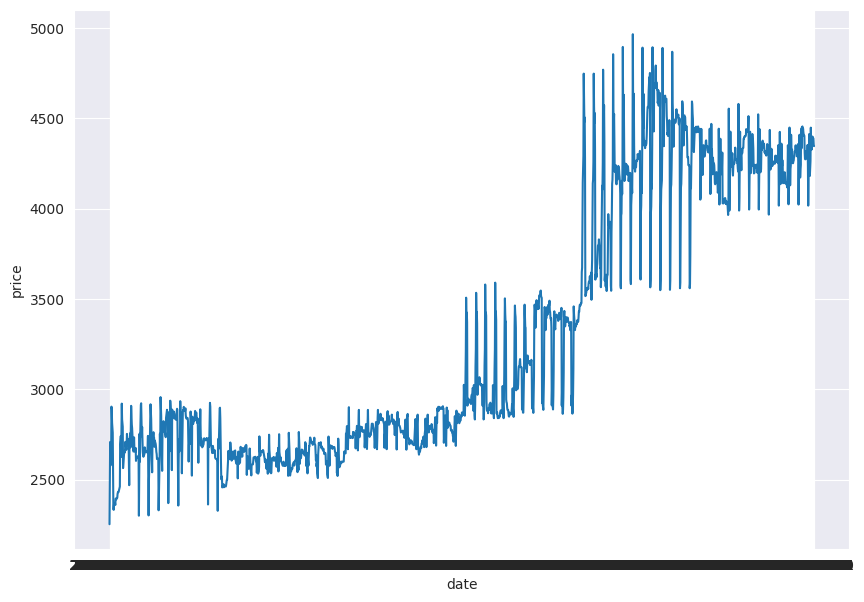

In [20]:
sns.lineplot(x='date',y='price',data=df)
plt.rcParams['figure.figsize'] = (20,8)
plt.show()

# Checking Stationarity of the data

In [21]:
adfuller(df['price'])[1]

0.9240899189079189

Null hypothesis: Data is Non stationary

Alternate Hypothesis: Data is Stationary

If p< 0.05 ; Data is stationary

if p>0.05; Data is not stationary

According the p-value, the dataset is non-stationary as the p value is greater than alpha value.

In [22]:
import  plotly.express  as pe

In [23]:
plt.rcParams['figure.figsize'] = (20,8)
pe.line(x=df['date'],y=df['price'])

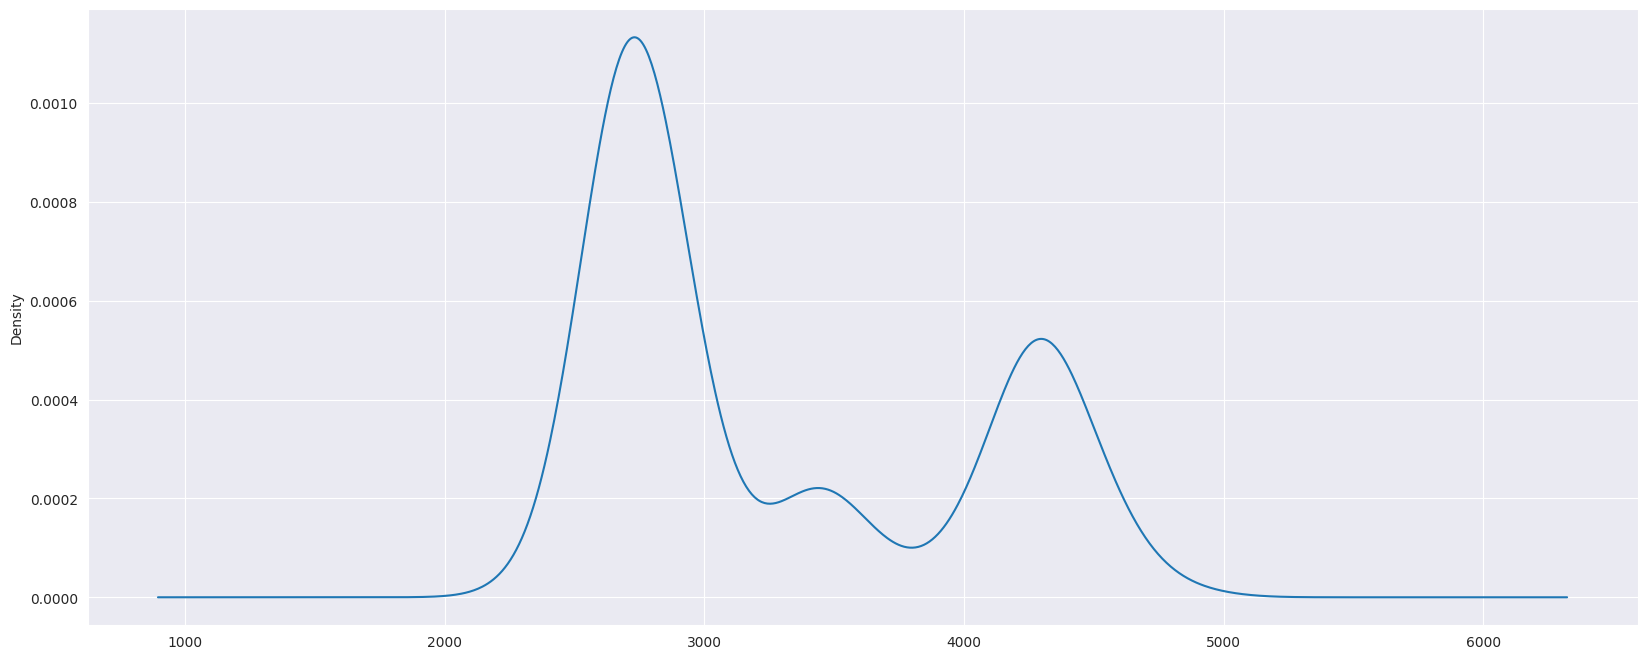

In [24]:
#kde plot
df['price'].plot(kind='kde')
plt.rcParams['figure.figsize'] = (12,4)

 We can see that The graph is right skewed

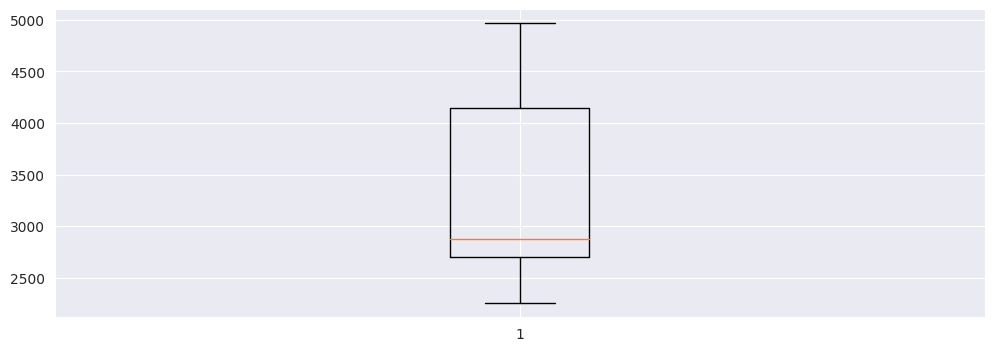

In [25]:
# boxplot to just confirm outliers present or not
plt.boxplot(df['price'])
plt.rcParams['figure.figsize'] = (10,7)

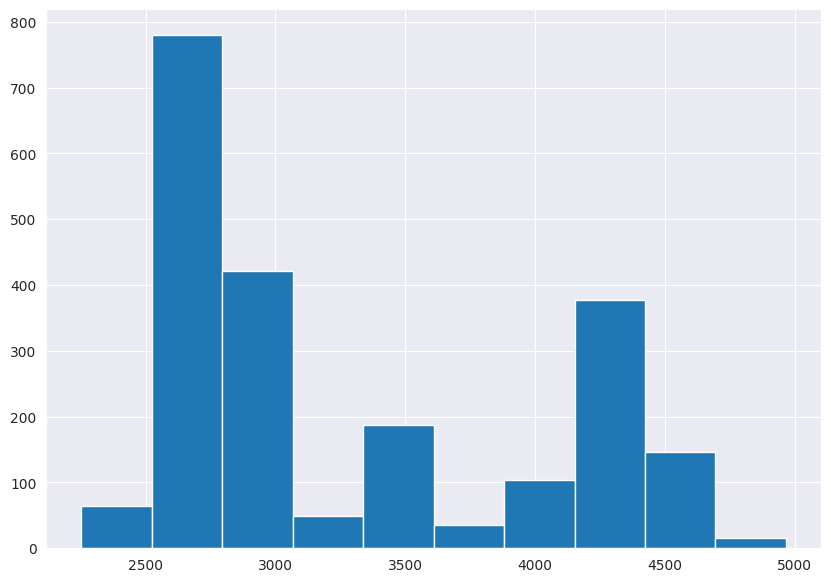

In [26]:
# histogram
plt.hist(x=df['price'])
plt.rcParams['figure.figsize'] = (12,7)

 we have ploted histogram to check the range of the price. 2500 to 3100 is more & from 4300 to 4100 is more

In [27]:
pip install calplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8119 sha256=2a83326b3ade381e2d33901290e6feaca81b071857ec3928e0825eb7c62fab89
  Stored in directory: /root/.cache/pip/wheels/77/75/32/a518a4a1421776a93e1ede33cb8dac474095bf31fed7e4e22c
Successfully built calplot


(<Figure size 1250x1020 with 7 Axes>,
 array([<Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>], dtype=object))

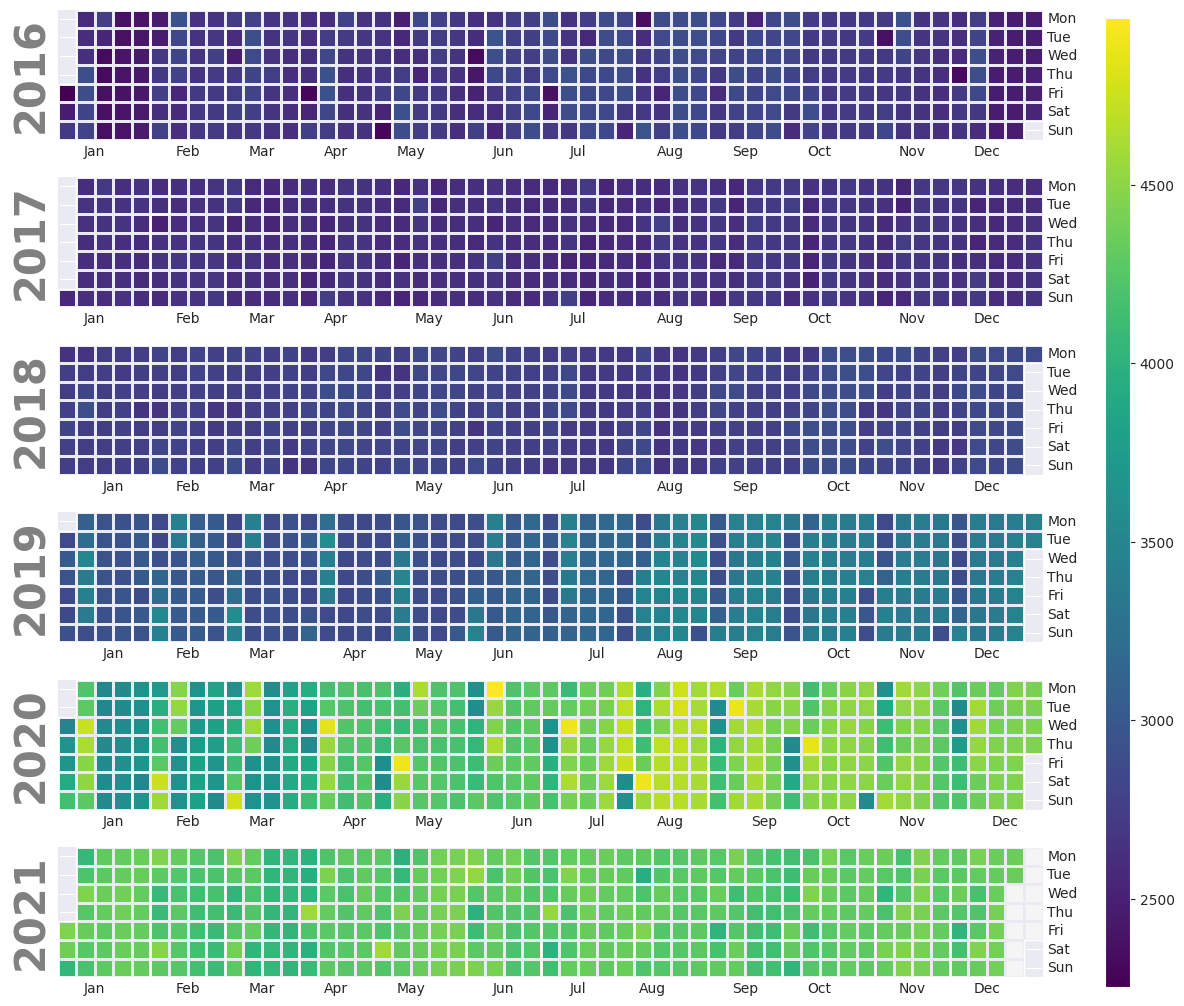

In [28]:
import calplot
df.index = pd.to_datetime(df['date'])
calplot.calplot(df['price'],edgecolor=None)

Cal Plot is similar as calender we can year/months/day Graph
Lighter color is for more price and darker color is for less price

In [29]:
from pandas.plotting import lag_plot


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

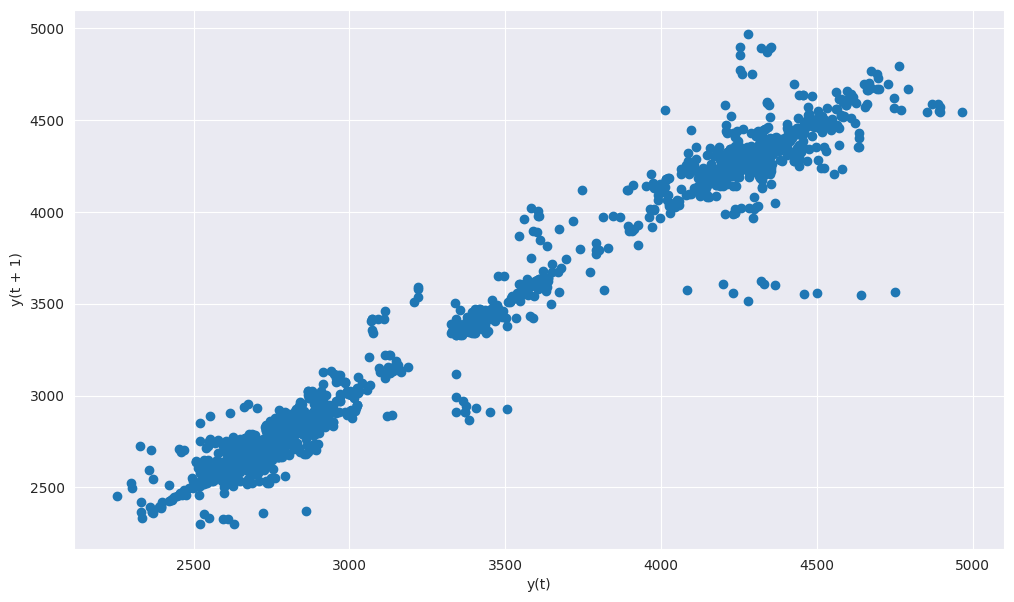

In [30]:
lag_plot(df['price'])

In [31]:
df['first_order'] = df['price'].diff(periods=1)

In [32]:
df

,date,price,Date,month,year,days,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,first_order
date,,,,,,,,,,,,,,,,,,,
2016-01-01,2016-01-01,2252.60,2016-01-01,Jan,2016,01,0,0,0,0,1,0,0,0,0,0,0,0,NaN
2016-01-02,2016-01-02,2454.50,2016-01-02,Jan,2016,02,0,0,0,0,1,0,0,0,0,0,0,0,201.90
2016-01-03,2016-01-03,2708.10,2016-01-03,Jan,2016,03,0,0,0,0,1,0,0,0,0,0,0,0,253.60
2016-01-04,2016-01-04,2577.80,2016-01-04,Jan,2016,04,0,0,0,0,1,0,0,0,0,0,0,0,-130.30
2016-01-05,2016-01-05,2597.75,2016-01-05,Jan,2016,05,0,0,0,0,1,0,0,0,0,0,0,0,19.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,2021-12-17,4394.40,2021-12-17,Dec,2021,17,0,0,1,0,0,0,0,0,0,0,0,0,-5.40
2021-12-18,2021-12-18,4389.50,2021-12-18,Dec,2021,18,0,0,1,0,0,0,0,0,0,0,0,0,-4.90
2021-12-19,2021-12-19,4389.50,2021-12-19,Dec,2021,19,0,0,1,0,0,0,0,0,0,0,0,0,0.00


In [33]:
df.dropna(inplace=True)

In [34]:
df

,date,price,Date,month,year,days,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,first_order
date,,,,,,,,,,,,,,,,,,,
2016-01-02,2016-01-02,2454.50,2016-01-02,Jan,2016,02,0,0,0,0,1,0,0,0,0,0,0,0,201.90
2016-01-03,2016-01-03,2708.10,2016-01-03,Jan,2016,03,0,0,0,0,1,0,0,0,0,0,0,0,253.60
2016-01-04,2016-01-04,2577.80,2016-01-04,Jan,2016,04,0,0,0,0,1,0,0,0,0,0,0,0,-130.30
2016-01-05,2016-01-05,2597.75,2016-01-05,Jan,2016,05,0,0,0,0,1,0,0,0,0,0,0,0,19.95
2016-01-06,2016-01-06,2617.70,2016-01-06,Jan,2016,06,0,0,0,0,1,0,0,0,0,0,0,0,19.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,2021-12-17,4394.40,2021-12-17,Dec,2021,17,0,0,1,0,0,0,0,0,0,0,0,0,-5.40
2021-12-18,2021-12-18,4389.50,2021-12-18,Dec,2021,18,0,0,1,0,0,0,0,0,0,0,0,0,-4.90
2021-12-19,2021-12-19,4389.50,2021-12-19,Dec,2021,19,0,0,1,0,0,0,0,0,0,0,0,0,0.00


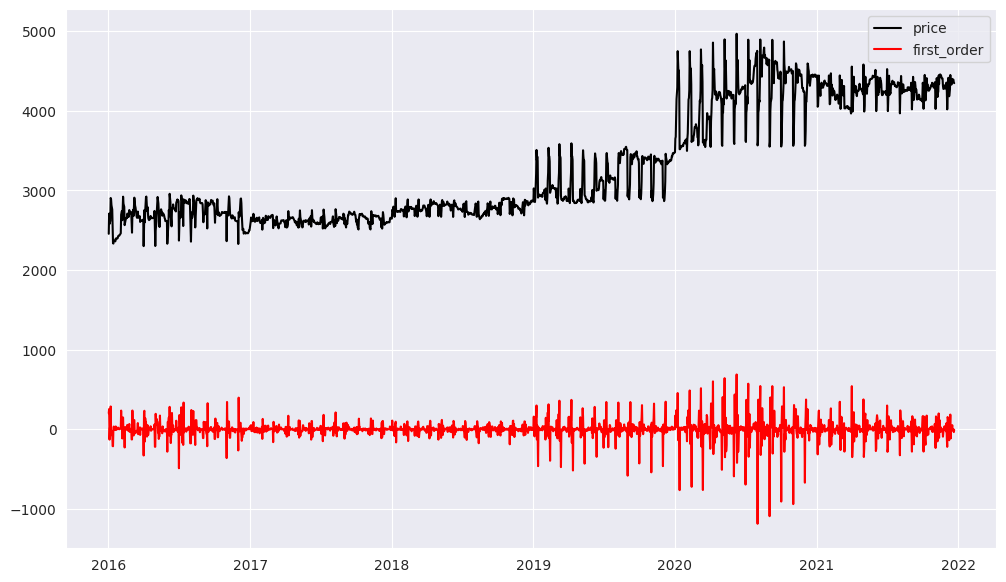

In [35]:
plt.plot(df['price'],color='black',label='price')
plt.plot(df['first_order'],color='red',label='first_order')
plt.legend()

# Auto Correlation Function ( ACF )

In [36]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [37]:
# Calculate Auto-Correlation value
acf_val = acf(df['first_order'])
acf_val

array([ 1.        , -0.00788177, -0.15744259, -0.00773793, -0.04251641,
       -0.00431751, -0.10832278, -0.18217087,  0.02539288, -0.01880908,
       -0.00493468,  0.02249464, -0.01838395,  0.00908271,  0.00545384,
        0.00264774,  0.016128  , -0.00600254, -0.00707106,  0.01025575,
        0.02723141, -0.01556785,  0.00585119, -0.05344668, -0.16565684,
       -0.04733117, -0.01930078, -0.03447573, -0.03330576, -0.03330988,
        0.3132137 ,  0.43705872, -0.0433302 , -0.08478782])

here we can see almost [ 32 ] period or step lag variable is 44% correlate with current data

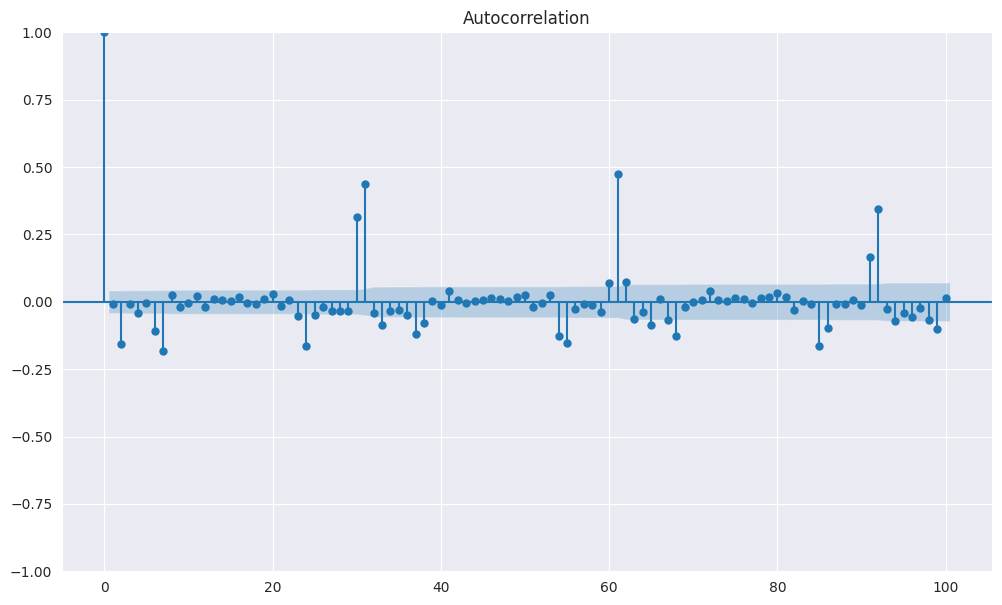

In [38]:
# Looking by ploting graph
plot_acf(df['first_order'],lags=100)
plt.show()

Here we can see the points near about 35 , 62 , 94 are crossing our Standred Error so we can say this are Statistical Significant

# Partial Auto Correlation Function ( PACF )

In [39]:
# calculate pacf value
pacf_value = pacf(df['first_order'])
pacf_value

array([ 1.00000000e+00, -7.88538136e-03, -1.57659082e-01, -1.06968760e-02,
       -6.93590685e-02, -8.73735817e-03, -1.30878409e-01, -1.98161207e-01,
       -3.09460709e-02, -9.85814199e-02, -3.84613194e-02, -3.59201662e-02,
       -6.03886373e-02, -5.90344502e-02, -6.39180300e-02, -3.37598030e-02,
       -3.54681194e-02, -3.36684847e-02, -3.69306170e-02, -2.86683668e-02,
        6.63882721e-04, -4.16273711e-02, -3.26783235e-03, -8.14845461e-02,
       -2.11101923e-01, -1.34256728e-01, -1.52185141e-01, -1.63472999e-01,
       -2.14855165e-01, -2.64680317e-01,  7.85925385e-02,  3.70718471e-01,
        1.22883321e-01,  6.74221770e-02])

 Pacf will give which lag variable is directly impact on current data

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



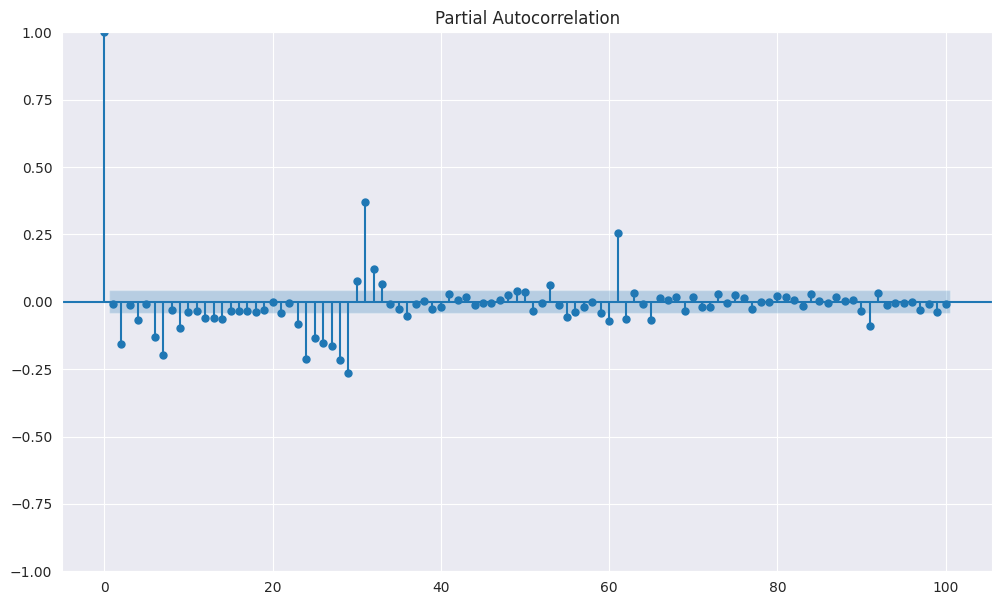

In [40]:
plot_pacf(df['first_order'],lags=100)
plt.show()

In [41]:
df

,date,price,Date,month,year,days,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,first_order
date,,,,,,,,,,,,,,,,,,,
2016-01-02,2016-01-02,2454.50,2016-01-02,Jan,2016,02,0,0,0,0,1,0,0,0,0,0,0,0,201.90
2016-01-03,2016-01-03,2708.10,2016-01-03,Jan,2016,03,0,0,0,0,1,0,0,0,0,0,0,0,253.60
2016-01-04,2016-01-04,2577.80,2016-01-04,Jan,2016,04,0,0,0,0,1,0,0,0,0,0,0,0,-130.30
2016-01-05,2016-01-05,2597.75,2016-01-05,Jan,2016,05,0,0,0,0,1,0,0,0,0,0,0,0,19.95
2016-01-06,2016-01-06,2617.70,2016-01-06,Jan,2016,06,0,0,0,0,1,0,0,0,0,0,0,0,19.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,2021-12-17,4394.40,2021-12-17,Dec,2021,17,0,0,1,0,0,0,0,0,0,0,0,0,-5.40
2021-12-18,2021-12-18,4389.50,2021-12-18,Dec,2021,18,0,0,1,0,0,0,0,0,0,0,0,0,-4.90
2021-12-19,2021-12-19,4389.50,2021-12-19,Dec,2021,19,0,0,1,0,0,0,0,0,0,0,0,0,0.00


In [42]:
df['t'] = np.arange(0,2181)

In [43]:
df['t_squared'] = df['t']*df['t']
df['log_price'] = np.log(df['price'])

In [44]:
df

,date,price,Date,month,year,days,Apr,Aug,Dec,Feb,...,Jun,Mar,May,Nov,Oct,Sep,first_order,t,t_squared,log_price
date,,,,,,,,,,,,,,,,,,,,,
2016-01-02,2016-01-02,2454.50,2016-01-02,Jan,2016,02,0,0,0,0,...,0,0,0,0,0,0,201.90,0,0,7.805678
2016-01-03,2016-01-03,2708.10,2016-01-03,Jan,2016,03,0,0,0,0,...,0,0,0,0,0,0,253.60,1,1,7.904003
2016-01-04,2016-01-04,2577.80,2016-01-04,Jan,2016,04,0,0,0,0,...,0,0,0,0,0,0,-130.30,2,4,7.854692
2016-01-05,2016-01-05,2597.75,2016-01-05,Jan,2016,05,0,0,0,0,...,0,0,0,0,0,0,19.95,3,9,7.862401
2016-01-06,2016-01-06,2617.70,2016-01-06,Jan,2016,06,0,0,0,0,...,0,0,0,0,0,0,19.95,4,16,7.870051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,2021-12-17,4394.40,2021-12-17,Dec,2021,17,0,0,1,0,...,0,0,0,0,0,0,-5.40,2176,4734976,8.388086
2021-12-18,2021-12-18,4389.50,2021-12-18,Dec,2021,18,0,0,1,0,...,0,0,0,0,0,0,-4.90,2177,4739329,8.386971
2021-12-19,2021-12-19,4389.50,2021-12-19,Dec,2021,19,0,0,1,0,...,0,0,0,0,0,0,0.00,2178,4743684,8.386971


In [45]:
df.drop(columns='date',inplace=True)

In [46]:
# Speliting the data into train & test
train = df.head(2181)
test = df.tail(20)

In [47]:
train.shape

(2181, 21)

In [48]:
test.shape

(20, 21)

## ARIMA Model

Finding with Auto Arima

In [49]:
order = auto_arima(df['price'])

In [50]:
order

ARIMA(order=(5, 1, 5), scoring_args={}, suppress_warnings=True)

##### AR model = There are 4 lag variable which are effecting my model
##### MA model = There are 5 order of Moving Average
##### d is [ 0 / zero ] bcz data is stationary          


In [51]:
arima_model = ARIMA(train['price'],order=(5,1,5)).fit()
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



## Evaluating the Model

In [52]:
test

,price,Date,month,year,days,Apr,Aug,Dec,Feb,Jan,...,Jun,Mar,May,Nov,Oct,Sep,first_order,t,t_squared,log_price
date,,,,,,,,,,,,,,,,,,,,,
2021-12-02,4238.1,2021-12-02,Dec,2021,02,0,0,1,0,0,...,0,0,0,0,0,0,-115.1,2161,4669921,8.351870
2021-12-03,4017.1,2021-12-03,Dec,2021,03,0,0,1,0,0,...,0,0,0,0,0,0,-221.0,2162,4674244,8.298316
2021-12-04,4170.4,2021-12-04,Dec,2021,04,0,0,1,0,0,...,0,0,0,0,0,0,153.3,2163,4678569,8.335767
2021-12-05,4305.5,2021-12-05,Dec,2021,05,0,0,1,0,0,...,0,0,0,0,0,0,135.1,2164,4682896,8.367649
2021-12-06,4413.6,2021-12-06,Dec,2021,06,0,0,1,0,0,...,0,0,0,0,0,0,108.1,2165,4687225,8.392446
2021-12-07,4319.4,2021-12-07,Dec,2021,07,0,0,1,0,0,...,0,0,0,0,0,0,-94.2,2166,4691556,8.370872
2021-12-08,4181.5,2021-12-08,Dec,2021,08,0,0,1,0,0,...,0,0,0,0,0,0,-137.9,2167,4695889,8.338425
2021-12-09,4219.4,2021-12-09,Dec,2021,09,0,0,1,0,0,...,0,0,0,0,0,0,37.9,2168,4700224,8.347448
2021-12-10,4264.7,2021-12-10,Dec,2021,10,0,0,1,0,0,...,0,0,0,0,0,0,45.3,2169,4704561,8.358127


In [53]:
ypred = arima_model.predict(start=2162,end=2181)
ypred

2021-12-03    4204.398853
2021-12-04    4063.602778
2021-12-05    4221.378145
2021-12-06    4290.165054
2021-12-07    4413.389170
2021-12-08    4262.019888
2021-12-09    4218.755131
2021-12-10    4275.778601
2021-12-11    4234.349712
2021-12-12    4434.917227
2021-12-13    4285.426224
2021-12-14    4376.007269
2021-12-15    4352.798515
2021-12-16    4289.472254
2021-12-17    4400.192015
2021-12-18    4363.679349
2021-12-19    4400.914770
2021-12-20    4387.200692
2021-12-21    4290.843022
2021-12-22    4376.758586
Freq: D, Name: predicted_mean, dtype: float64

In [54]:
print(np.sqrt(mean_squared_error(test['price'],ypred)))

37.506012977886805


In [55]:
# Here we have Worst model BCZ we are looking for a close value to RMSE

In [56]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

# Linear Model

In [57]:
linear_model  = smf.ols('price~t',data=df,).fit()
pred_linear = pd.Series(linear_model.predict(test['t']))
rmse_lm = np.sqrt(mean_squared_error(test['price'],pred_linear))
rmse_lm

115.96803345235291

# Quadratic Model

In [58]:

quad_model = smf.ols('price~t+t_squared',data=train).fit()
pred_quad = quad_model.predict(test[["t", "t_squared"]])

rmse_quad = np.sqrt(mean_squared_error(test['price'],pred_quad))
rmse_quad

483.9839625493493

# Additive Seasonality

In [59]:

as_model = smf.ols('price~ Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov', data=train).fit()
pred_as = as_model.predict(test[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']])
rmse_as = np.sqrt(mean_squared_error(test['price'], pred_as))
rmse_as


1047.6206746603557

# Additive Seasonality Quadratic¶

In [60]:
asq_model = smf.ols('price~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_asq = pd.Series(asq_model.predict(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_asq = np.sqrt(mean_squared_error(test['price'],pred_asq))
rmse_asq

370.14062771849365

# Multiplicative Seasonality

In [61]:

Mul_sea = smf.ols('log_price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_ms = np.sqrt(mean_squared_error(test['log_price'],pred_Mult_sea))
rmse_ms

0.30204462641866686

# Multiplicative Additive Seasonality

In [62]:
Mul_Add_sea = smf.ols('log_price~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_mas = np.sqrt(mean_squared_error(test['log_price'],pred_Mult_add_sea))
rmse_mas

0.0257239253879951

# Multiplicative Seasonality Quadratic¶

In [63]:
mult_sea_Quad = smf.ols('log_price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_msq = np.sqrt(mean_squared_error(test['log_price'],pred_Mult_add_sea))
rmse_msq

0.0257239253879951

In [64]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_lm,rmse_quad,rmse_as,rmse_ms,rmse_mas])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_Mult_sea,0.025724
3,rmse_add_sea_quad,0.302045
0,rmse_linear,115.968033
1,rmse_Quad,483.983963
2,rmse_add_sea,1047.620675
5,rmse_Mult_add_sea,NaN


In [100]:
final_model =smf.ols('price~t',data=df).fit()
final_model

In [81]:
pred_new  = pd.date_range(start='2021-12-21', end='2022-01-21')
pred_new

DatetimeIndex(['2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-01',
               '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17',
               '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21'],
              dtype='datetime64[ns]', freq='D')

In [82]:
type(pred_new)

pandas.core.indexes.datetimes.DatetimeIndex

Evaluation Metric MAPE


In [101]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Simple Exponential Method

In [104]:
Train = df.head(147)
Test = df.tail(12)
Test.tail()

,price,Date,month,year,days,Apr,Aug,Dec,Feb,Jan,...,Jun,Mar,May,Nov,Oct,Sep,first_order,t,t_squared,log_price
date,,,,,,,,,,,,,,,,,,,,,
2021-12-17,4394.4,2021-12-17,Dec,2021,17,0,0,1,0,0,...,0,0,0,0,0,0,-5.4,2176,4734976,8.388086
2021-12-18,4389.5,2021-12-18,Dec,2021,18,0,0,1,0,0,...,0,0,0,0,0,0,-4.9,2177,4739329,8.386971
2021-12-19,4389.5,2021-12-19,Dec,2021,19,0,0,1,0,0,...,0,0,0,0,0,0,0.0,2178,4743684,8.386971
2021-12-20,4354.1,2021-12-20,Dec,2021,20,0,0,1,0,0,...,0,0,0,0,0,0,-35.4,2179,4748041,8.378873
2021-12-21,4346.5,2021-12-21,Dec,2021,21,0,0,1,0,0,...,0,0,0,0,0,0,-7.6,2180,4752400,8.377126


In [105]:
ses_model = SimpleExpSmoothing(Train["price"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.price)

38.810826053278554

# Holt method

In [107]:
# Holt method
hw_model = Holt(Train["price"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.price)

667.1421660333568

Holts winter exponential smoothing with additive seasonality and additive trend

In [108]:
hwe_model_add_add = ExponentialSmoothing(Train["price"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.price)

132.49728362543632

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [109]:
hwe_model_mul_add = ExponentialSmoothing(Train["price"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.price)

139.67041253251

In [110]:
hwe_model_add_add = ExponentialSmoothing(df.price,seasonal="add",trend="add",seasonal_periods=12).fit()

In [115]:
#Forecasting for next 30 days
hwe_model_add_add.forecast(30)

2021-12-22    4342.010537
2021-12-23    4338.380570
2021-12-24    4353.165892
2021-12-25    4356.670727
2021-12-26    4358.045225
2021-12-27    4373.530202
2021-12-28    4368.920775
2021-12-29    4357.446797
2021-12-30    4356.554134
2021-12-31    4367.836816
2022-01-01    4370.490824
2022-01-02    4361.669119
2022-01-03    4357.190549
2022-01-04    4353.560582
2022-01-05    4368.345904
2022-01-06    4371.850738
2022-01-07    4373.225237
2022-01-08    4388.710213
2022-01-09    4384.100786
2022-01-10    4372.626809
2022-01-11    4371.734145
2022-01-12    4383.016827
2022-01-13    4385.670835
2022-01-14    4376.849130
2022-01-15    4372.370560
2022-01-16    4368.740593
2022-01-17    4383.525915
2022-01-18    4387.030749
2022-01-19    4388.405248
2022-01-20    4403.890225
Freq: D, dtype: float64